In [1]:
import tensorflow.keras as keras
from keras.preprocessing.image import load_img
import numpy as np
from keras.preprocessing import image
from matplotlib import  pyplot as plt
import time
import os
import cv2
from skimage import io
import time

Using TensorFlow backend.


In [2]:
generator = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=65,
    horizontal_flip=True,
    vertical_flip = True,
    shear_range=0.2, #the image will be distorted along an axis to augment images so that computers can see how humans see things from different angles
    zoom_range=0.08,
    fill_mode='nearest', # nearest, constant, reflact, 
    preprocessing_function=None,
    cval=0 # color value (gray)
)

## file Management

In [3]:
data_dir = 'F:\\Research database\\Shrimp Recognition\\testing\\golda2\\' 
save_here = 'F:\\Research database\\Shrimp Recognition\\training\\'
main_classes = os.listdir(data_dir) # list of directory
print(main_classes)
len_main_classes = len(main_classes)
print('total class ',len_main_classes)

['golda']
total class  1


## working with single image

F:\Research database\Shrimp Recognition\testing\golda2\golda
['golda (1).jpg', 'golda (10).jpg']


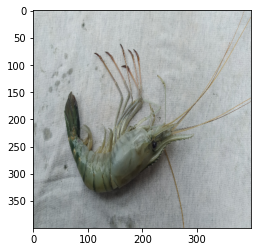

In [4]:

class_path = os.path.join(data_dir,main_classes[0])
print(class_path)
print(os.listdir(class_path)[:2]) # image name list # need to run for loop here
for img in os.listdir(class_path)[:1]:
    image_path = os.path.join(class_path,img) #worik with this
    single_image  = load_img(image_path, grayscale=False,target_size=(400, 400), color_mode='rgb')
    x = image.img_to_array(single_image)
    plt.imshow(x/255.)

In [5]:
image_classes = os.listdir(data_dir)
for category in image_classes:
    save_dir = os.path.join(save_here,category)
    category_dir =  os.path.join(data_dir,category)
    if not os.path.isdir(save_dir):
        os.mkdir(save_dir)
        print(save_dir)
    aug_num = 0
    for img_name in os.listdir(category_dir):
        img_path = os.path.join(category_dir,img_name)
        single_image  = load_img(img_path, grayscale=False,target_size=(400, 400), color_mode='rgb',interpolation='nearest')
        single_image = np.array(single_image)
        single_image = single_image.reshape((1,) + single_image.shape)
#         print(single_image.shape)
#         time.sleep(1)
        image_num = 0
        for batch in generator.flow(single_image,save_to_dir=save_dir, save_prefix='agu_'+category, save_format='jpeg', batch_size=1):
            image_num += 1
            aug_num += 1
            if aug_num % 100 == 0:
                print(aug_num)
            if image_num >= 7000/len((os.listdir(category_dir))) or aug_num >= 7000: # 2000/(os.listdir(category_dir)) needed to control how many imge need to be augmented
                break
            

F:\Research database\Shrimp Recognition\training\golda
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
